# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
table = soup.find('table')  
rows = table.find_all('tr')  

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [8]:
# Create an empty list
data = []

# Loop through the scraped data to create a list of rows
for row in rows:
    columns = row.find_all('td')  
    columns = [ele.text.strip() for ele in columns]  
    if columns:  
        data.append(columns)  

In [10]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
column_names = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
weather_df = pd.DataFrame(data, columns=column_names)


In [11]:
# Confirm DataFrame was created successfully
weather_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [12]:
# Examine data type of each column
weather_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [13]:
# Change data types for data analysis
weather_df['id'] = weather_df['id'].astype(int)
weather_df['terrestrial_date'] = pd.to_datetime(weather_df['terrestrial_date'])
weather_df['sol'] = weather_df['sol'].astype(int)
weather_df['ls'] = weather_df['ls'].astype(int)
weather_df['month'] = weather_df['month'].astype(int)
weather_df['min_temp'] = weather_df['min_temp'].astype(float)
weather_df['pressure'] = weather_df['pressure'].astype(float)


In [14]:
# Confirm type changes were successful by examining data types again
weather_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [15]:
# 1. How many months are there on Mars?
num_months = weather_df['month'].nunique()
num_months

12

In [16]:
# 2. How many sols (Martian days) worth of data are there?
num_sols = weather_df['sol'].nunique()
num_sols

1867

In [17]:
# 3. What is the average minimum temperature by month?
avg_min_temp = weather_df.groupby('month')['min_temp'].mean()
avg_min_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

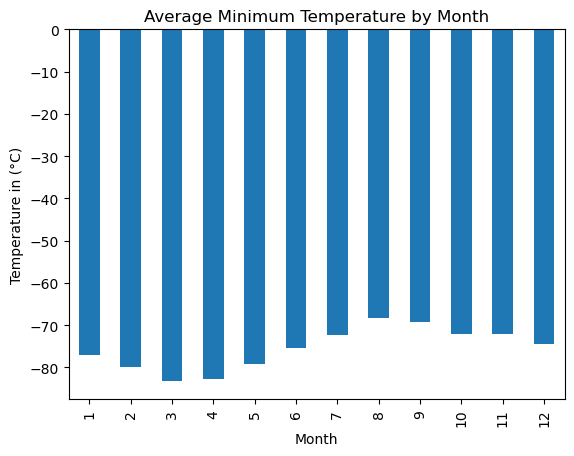

In [18]:
# Plot the average minimum temperature by month
avg_min_temp.plot(kind='bar', title='Average Minimum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature in (°C)')
plt.show()

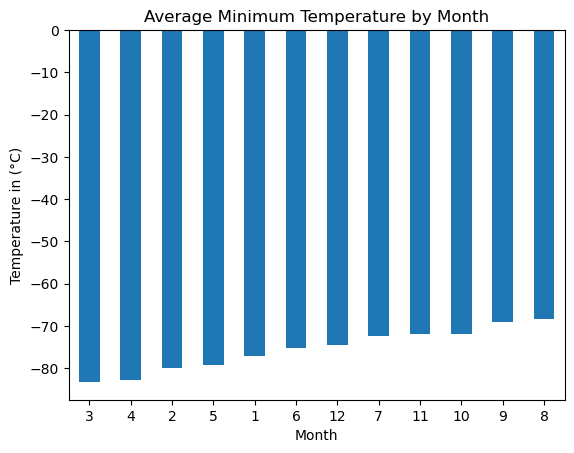

In [19]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph

avg_min_temp = weather_df.groupby('month')['min_temp'].mean()

# Sort the average minimum temperature from lowest to highest
sorted_avg_min_temp = avg_min_temp.sort_values(ascending=True)

# Plot the average minimum temperature by month
sorted_avg_min_temp.plot(kind='bar', title='Average Minimum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature in (°C)')
plt.xticks(rotation=0)  
plt.show()

In [20]:
# 4. What is the average pressure by month?
avg_pressure = weather_df.groupby('month')['pressure'].mean()
avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

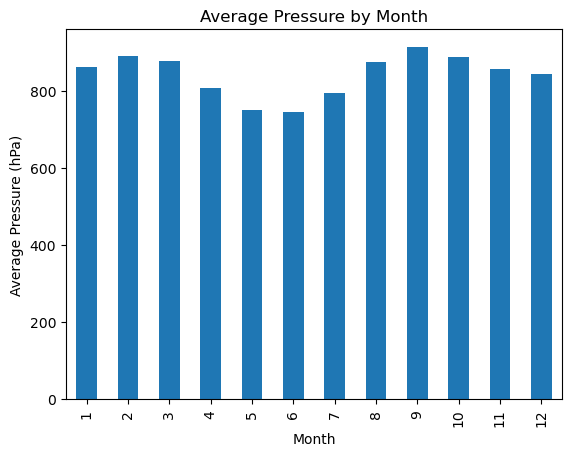

In [21]:
# Plot the average pressure by month
avg_pressure.plot(kind='bar', title='Average Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Average Pressure (hPa)')
plt.show()

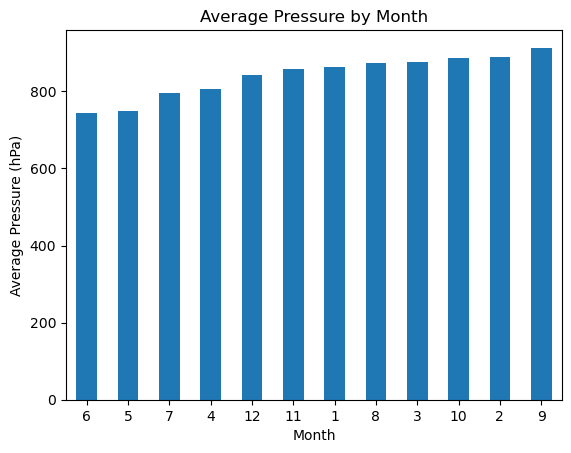

In [22]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph

avg_pressure = weather_df.groupby('month')['pressure'].mean()

# Sort the average pressure from lowest to highest
sorted_avg_pressure = avg_pressure.sort_values(ascending=True)

# Plot the graph
sorted_avg_pressure.plot(kind='bar', title='Average Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Average Pressure (hPa)')
plt.xticks(rotation=0)  
plt.show()

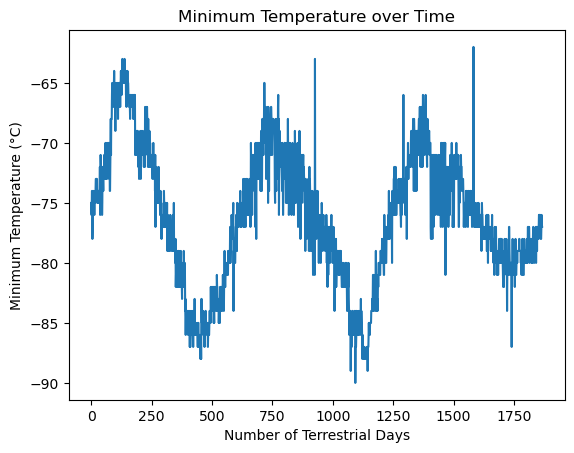

In [23]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
weather_df['min_temp'].plot(title='Minimum Temperature over Time')
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Minimum Temperature (°C)')
plt.show()

#### Minimum Temperature

As we can see in the ordered graph, the coldest months on Mars are months 3, 4 and 2 and the "warmest" months are months 8, 9 and 10. This must be taken into account since today they are forecast more explorations on Mars.
Average minimum temperatures on Mars display significant variation throughout the year, reflecting the planet's unique seasonal cycles. The coldest temperatures are typically recorded during the winter months in the Southern Hemisphere, where conditions can become extremely harsh. In contrast, summer months in the same hemisphere experience comparatively warmer temperatures. These temperatures can pose considerable challenges for the design and engineering of rovers and other technological systems that will be deployed in the Martian environment.

#### Atmospheric Pressure

The graph we obtained illustrates the variations in atmospheric pressure on Mars throughout the months. From this graph, we can observe that the lowest atmospheric pressures occur during the months of 5 to 7. Conversely, the highest pressures are typically recorded during months 10, 9, and 2. This significant fluctuation in pressure indicates that there are considerable changes in atmospheric conditions from month to month. As a result, it becomes challenging to make accurate predictions about the stability of atmospheric pressure, since it can vary greatly in a short time frame.

#### Year Length

The analysis of the temperature patterns reveals a sinusoidal function, which indicates that the Martian year spans approximately 687 Earth days. This extended duration means that each season on Mars lasts nearly twice as long as the corresponding seasons on Earth. Such an elongated seasonal cycle can lead to prolonged atmospheric phenomena and more extended weather patterns.
Understanding these temperature dynamics is crucial because they have significant implications for the Martian environment. The length of the Martian seasons influences not only the climate but also the behavior of various atmospheric processes
This understanding provides essential insights into the environmental conditions on Mars, which are vital for scientific research.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [26]:
# Write the data to a CSV

weather_df.to_csv("Resources/mars_weather_data.csv", index_label=False)

In [27]:
browser.quit()